# S07 - Démonstration 1: Titanic

Classification avec [les données du Titanic de Kaggle](https://www.kaggle.com/c/titanic/data).

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier, plot_tree

## Bloc 1: chargement des données

In [2]:
# Chargement des données
url = 'https://raw.githubusercontent.com/acedesci/scanalytics/master/data/titanic_train.csv'
data = pd.read_csv(url)
data.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Bloc 2: extraction des caractéristiques

In [3]:
# Encodage de la variable catégorique Sex
le_gender = LabelEncoder()
data['binary_sex'] = le_gender.fit_transform(data['Sex'])
data.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,binary_sex
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1


In [4]:
# Création de la la matrice X et du vecteur y
selected_features = ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'binary_sex']
X = data[selected_features].fillna(0).values  # les valeurs nulles sont remplacées par 0
y = data['Survived'].values
print(f"X: {X[:5]}")
print(f"y: {y[:5]}")

X: [[ 3.     22.      1.      0.      7.25    1.    ]
 [ 1.     38.      1.      0.     71.2833  0.    ]
 [ 3.     26.      0.      0.      7.925   0.    ]
 [ 1.     35.      1.      0.     53.1     0.    ]
 [ 3.     35.      0.      0.      8.05    1.    ]]
y: [0 1 1 1 0]


## Bloc 3: modèles et entraînement

In [5]:
# Séparation des données pour l'entraînement et la validation (75%/25% par défaut)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
print(f"Nombre d'observations pour l'entraînement: {X_train.shape[0]}")
print(f"Nombre d'observations pour l'évaluation: {X_test.shape[0]}")

Nombre d'observations pour l'entraînement: 668
Nombre d'observations pour l'évaluation: 223


### Modèle de régression logistique

In [6]:
# Entraînement de la régression logistique
logreg = LogisticRegression(random_state=0).fit(X_train, y_train)

#### Description du modèle

In [7]:
print(f"Biais: {logreg.intercept_[0]:.3f}")
coefs = {k: f"{v:.3f}" for k, v in zip(selected_features, logreg.coef_[0])}
print(f"Coefficients: {coefs}")

Biais: 3.601
Coefficients: {'Pclass': '-0.882', 'Age': '-0.016', 'SibSp': '-0.316', 'Parch': '0.001', 'Fare': '0.002', 'binary_sex': '-2.594'}


### Modèle d'arbre de décision

In [8]:
# Entraînement de l'arbre de décision
tree = DecisionTreeClassifier(random_state=0).fit(X_train, y_train)

#### Exploration de l'arbre et de l'importance des caractéristiques

Nombre de feuilles: 162


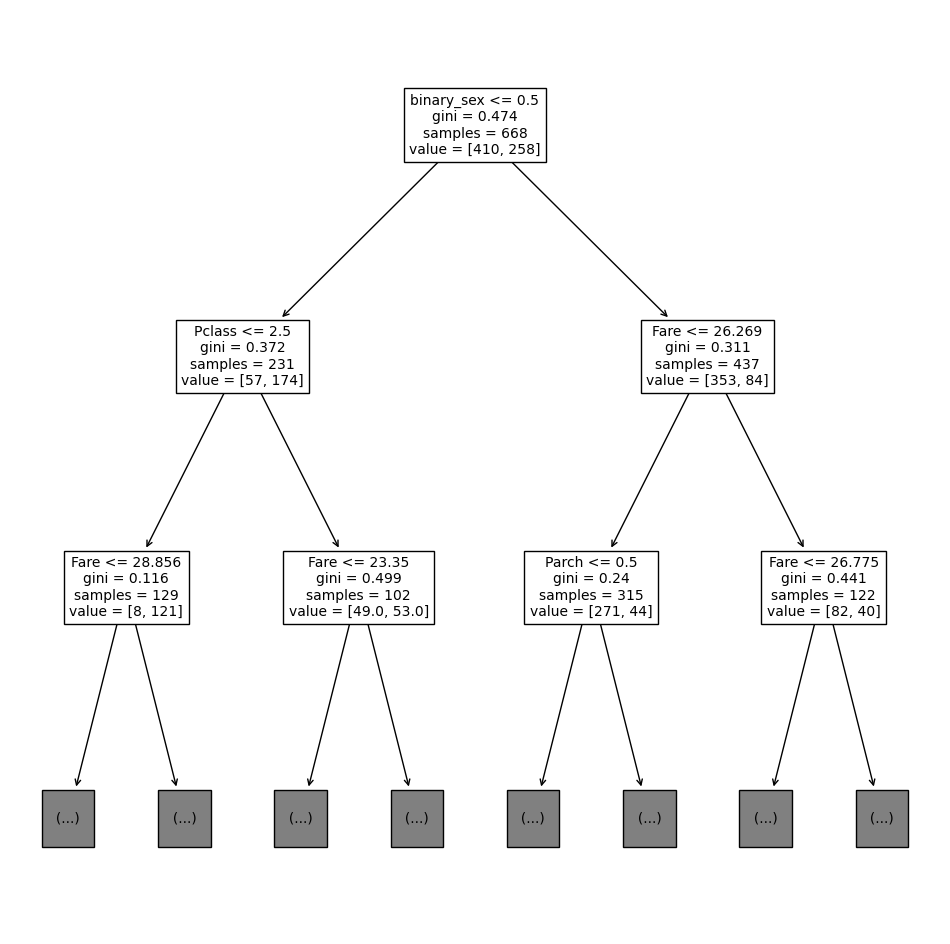

In [9]:
plt.figure(figsize=(12,12))
plot_tree(tree, feature_names=selected_features, fontsize=10, max_depth=2)
print(f"Nombre de feuilles: {tree.get_n_leaves()}")
# Pour d'autres visualisation d'arbres, je vous conseille de regarder la librairie dtreeviz
# https://github.com/parrt/dtreeviz

In [10]:
print({k: f"{v:.3f}" for k, v in zip(selected_features, tree.feature_importances_)})

{'Pclass': '0.084', 'Age': '0.221', 'SibSp': '0.027', 'Parch': '0.045', 'Fare': '0.307', 'binary_sex': '0.315'}


## Bloc 4: évaluation
Calcul de la justesse des modèles (régression logistique ou arbre de décision)

In [11]:
# Affichage des résultats
print("**Régression logistique**")
print(f"Justesse (entraînement): {logreg.score(X_train, y_train):.3f}")  # accuracy
print(f"Justesse (test): {logreg.score(X_test, y_test):.3f}")  # accuracy

print("\n**Arbre de décision**")
print(f"Justesse (entraînement): {tree.score(X_train, y_train):.3f}")  # accuracy
print(f"Justesse (test): {tree.score(X_test, y_test):.3f}")  # accuracy


**Régression logistique**
Justesse (entraînement): 0.786
Justesse (test): 0.789

**Arbre de décision**
Justesse (entraînement): 0.981
Justesse (test): 0.803


Il est aussi possible de tester différentes configurations de modèles avec une boucle. On remarque ici que le meilleur modèle de régression logistique utilise `C=10` et que le meilleur modèle d'arbre de décision utilise `max_leaf_nodes=28`.

In [12]:
for C in [0.001, 0.01, 1, 10]:
    logreg_new = LogisticRegression(random_state=0, C=C).fit(X_train, y_train)
    print(f"\n**Régression logistique (C={C})**")
    print(f"Justesse (entraînement): {logreg_new.score(X_train, y_train):.3f}")  # accuracy
    print(f"Justesse (test): {logreg_new.score(X_test, y_test):.3f}")  # accuracy


**Régression logistique (C=0.001)**
Justesse (entraînement): 0.672
Justesse (test): 0.700

**Régression logistique (C=0.01)**
Justesse (entraînement): 0.720
Justesse (test): 0.749

**Régression logistique (C=1)**
Justesse (entraînement): 0.786
Justesse (test): 0.789

**Régression logistique (C=10)**
Justesse (entraînement): 0.786
Justesse (test): 0.794


In [13]:
for max_leaf_nodes in [10, 20, 28, 30, 40]:
    tree_new = DecisionTreeClassifier(random_state=0, max_leaf_nodes=max_leaf_nodes).fit(
        X_train, y_train)
    print(f"\n**Arbre de décision (max_leaf_nodes={max_leaf_nodes})**")
    print(f"Nombre de feuilles: {tree_new.get_n_leaves()}")
    print(f"Justesse (entraînement): {tree_new.score(X_train, y_train):.3f}")  # accuracy
    print(f"Justesse (test): {tree_new.score(X_test, y_test):.3f}")  # accuracy


**Arbre de décision (max_leaf_nodes=10)**
Nombre de feuilles: 10
Justesse (entraînement): 0.844
Justesse (test): 0.830

**Arbre de décision (max_leaf_nodes=20)**
Nombre de feuilles: 20
Justesse (entraînement): 0.853
Justesse (test): 0.825

**Arbre de décision (max_leaf_nodes=28)**
Nombre de feuilles: 28
Justesse (entraînement): 0.879
Justesse (test): 0.852

**Arbre de décision (max_leaf_nodes=30)**
Nombre de feuilles: 30
Justesse (entraînement): 0.882
Justesse (test): 0.848

**Arbre de décision (max_leaf_nodes=40)**
Nombre de feuilles: 40
Justesse (entraînement): 0.900
Justesse (test): 0.843


## Bloc 5: prédiction sur des nouvelles données

In [14]:
# Réentraînement avec toutes les données
logreg = LogisticRegression(random_state=0, C=10).fit(X, y)
print("**Régression logistique**")
print(f"Justesse (entraînement): {logreg.score(X_train, y_train):.3f}")  # accuracy
print(f"Justesse (test): {logreg.score(X_test, y_test):.3f}")  # accuracy
print(f"Justesse (tout): {logreg.score(X, y):.3f}")  # accuracy

tree = DecisionTreeClassifier(random_state=0, max_leaf_nodes=28).fit(X, y)
print("\n**Arbre de décision**")
print(f"Justesse (entraînement): {tree.score(X_train, y_train):.3f}")  # accuracy
print(f"Justesse (test): {tree.score(X_test, y_test):.3f}")  # accuracy
print(f"Justesse (tout): {tree.score(X, y):.3f}")  # accuracy

**Régression logistique**
Justesse (entraînement): 0.787
Justesse (test): 0.794
Justesse (tout): 0.789

**Arbre de décision**
Justesse (entraînement): 0.871
Justesse (test): 0.883
Justesse (tout): 0.874


In [15]:
#Note: caractéristiques = ['Pclass','Age', 'SibSp', 'Parch', 'Fare','binary_sex']
jack = [3., 19., 0., 0., 5.0, 1.0]
rose = [1., 17., 1., 2., 100.0, 0.0]

print("\n**Nouvelles données**")
print(f"Jack: {jack}")
print(f"Rose: {rose}")


**Nouvelles données**
Jack: [3.0, 19.0, 0.0, 0.0, 5.0, 1.0]
Rose: [1.0, 17.0, 1.0, 2.0, 100.0, 0.0]


In [16]:
# Prédiction de la survie avec la régression logistique
survivor_proba = logreg.predict_proba([jack, rose])
survivor_predict = logreg.predict([jack, rose])
print("\n**Prédiction de la survie avec la régression logistique**")
print(f"Jack: probabilité de survie={survivor_proba[0][1]:.3f}; classe prédite={survivor_predict[0]}")
print(f"Rose: probabilité de survie={survivor_proba[1][1]:.3f}; classe prédite={survivor_predict[1]}")

# Prédiction de la survie avec l'arbre de décision
survivor_proba = tree.predict_proba([jack, rose])
survivor_predict = tree.predict([jack, rose])
print("\n**Prédiction de la survie avec l'arbre de décision**")
print(f"Jack: probabilité de survie={survivor_proba[0][1]:.3f}; classe prédite={survivor_predict[0]}")
print(f"Rose: probabilité de survie={survivor_proba[1][1]:.3f}; classe prédite={survivor_predict[1]}")


**Prédiction de la survie avec la régression logistique**
Jack: probabilité de survie=0.108; classe prédite=0
Rose: probabilité de survie=0.926; classe prédite=1

**Prédiction de la survie avec l'arbre de décision**
Jack: probabilité de survie=0.103; classe prédite=0
Rose: probabilité de survie=0.947; classe prédite=1
